In [5]:
!pip install matplotlib pandas numpy

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# importing client and price data
client_data_path = r"C:\Silomo_USB Files\Learning Material\The Forage_Simulations\Data Science\BCG X\Task 3\client_data.csv"
price_data_path = r"C:\Silomo_USB Files\Learning Material\The Forage_Simulations\Data Science\BCG X\Task 3\price_data.csv"

price = pd.read_csv(price_data_path)
customer = pd.read_csv(client_data_path)

In [11]:
# head() 
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [12]:
# head()
customer.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [23]:
# Checking data types
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [24]:
# data types
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [19]:
#Date time conversion
date_cols = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for c in date_cols:
    customer[c] = pd.to_datetime(customer[c])

price["price_date"] = pd.to_datetime(price["price_date"])


In [27]:
client = customer

# check data types
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [30]:
client.describe()
#client.nunique()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [31]:
client.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [32]:
#churn 
client["churn"].value_counts(normalize=True)


churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64

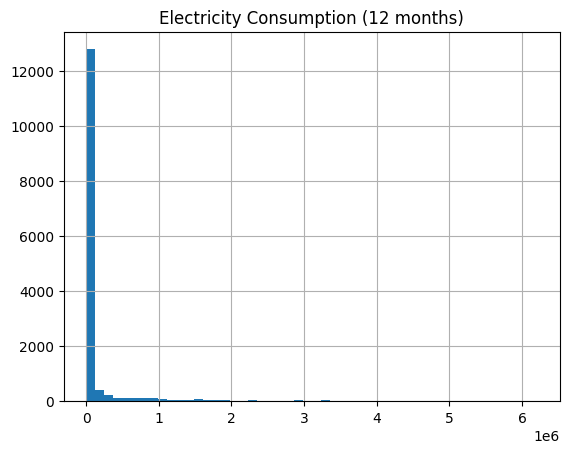

In [35]:
# Visuals: Numeric distribution
client["cons_12m"].hist(bins=50)
plt.title("Electricity Consumption (12 months)")
plt.show()




In [36]:
# categorical distribution
client["activity_new"].value_counts().plot(kind='bar')
plt.title("Customer Activity Types")
plt.show()


KeyError: 'activity_new'

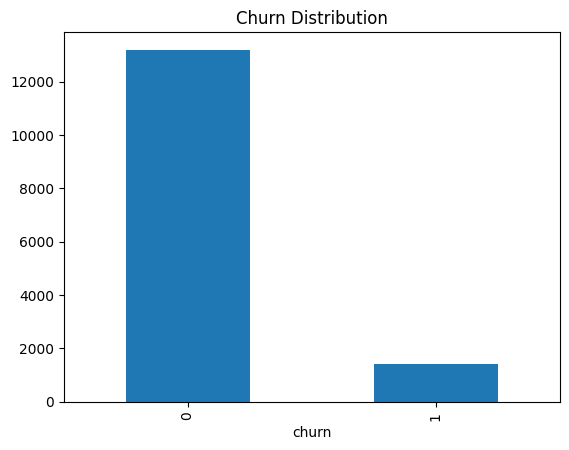

In [37]:

# Distribution of churners vs non-churners
client["churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()


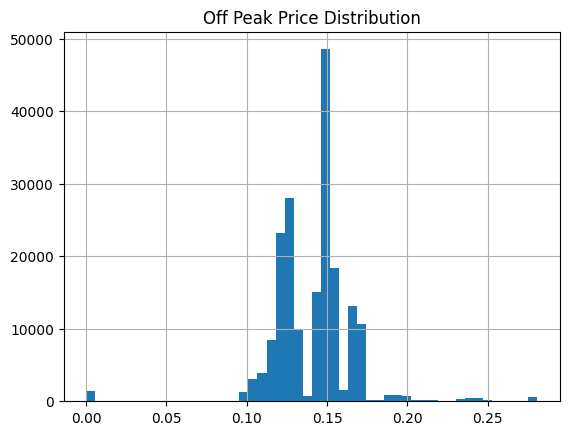

In [38]:
#Price variable distribution
price["price_off_peak_var"].hist(bins=50)
plt.title("Off Peak Price Distribution")
plt.show()


In [40]:
# join price and customer
df = client.merge(price, on="id", how="left")
df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


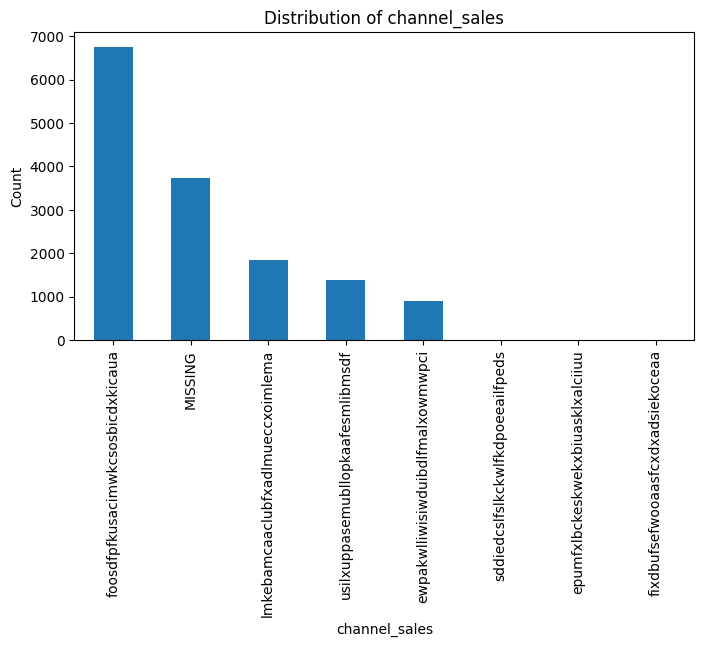

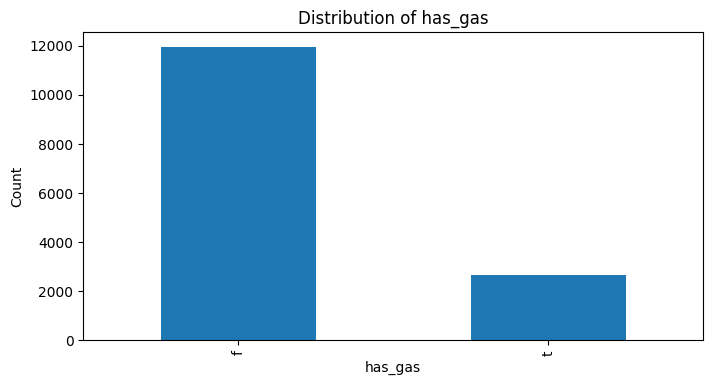

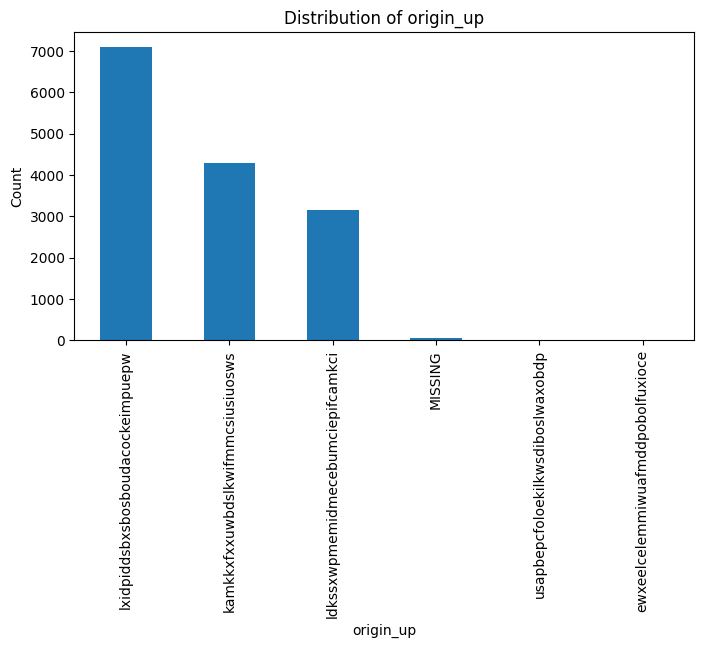

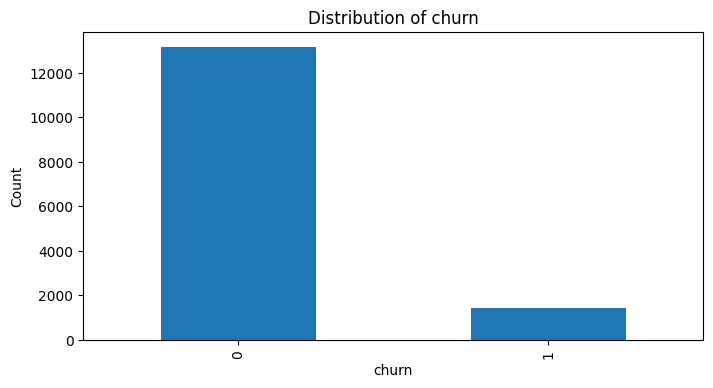

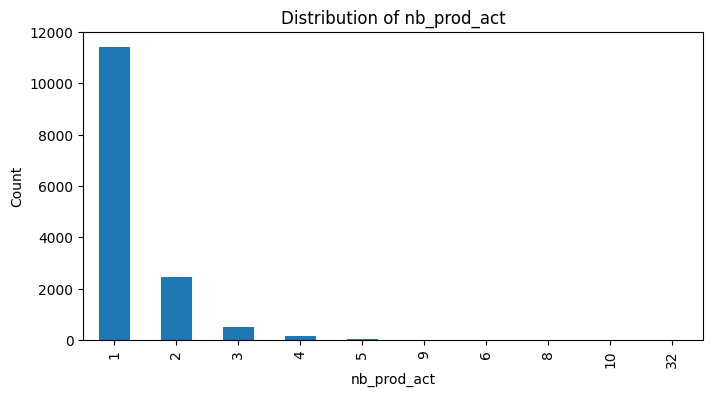

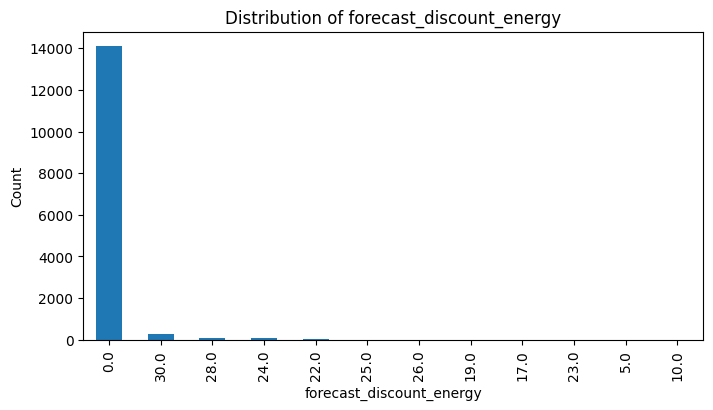

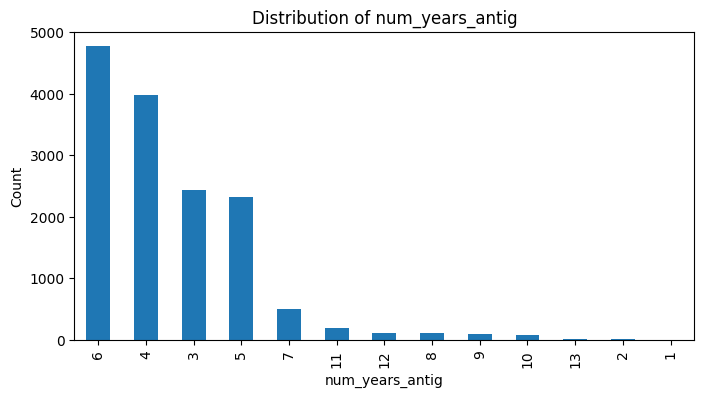

In [42]:
# categorical distribution
categorical_cols = [
    "channel_sales",
    "has_gas",
    "origin_up",
    "churn",
    "nb_prod_act",
    "forecast_discount_energy",
    "num_years_antig"
]

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    client[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



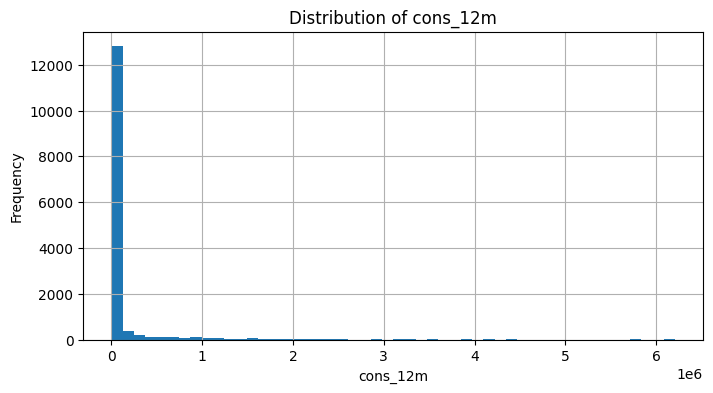

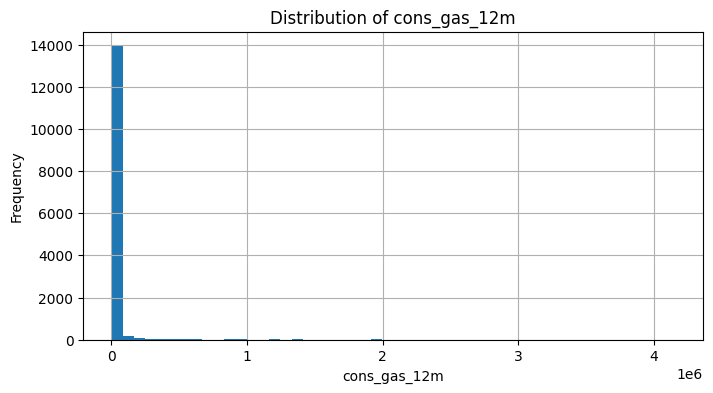

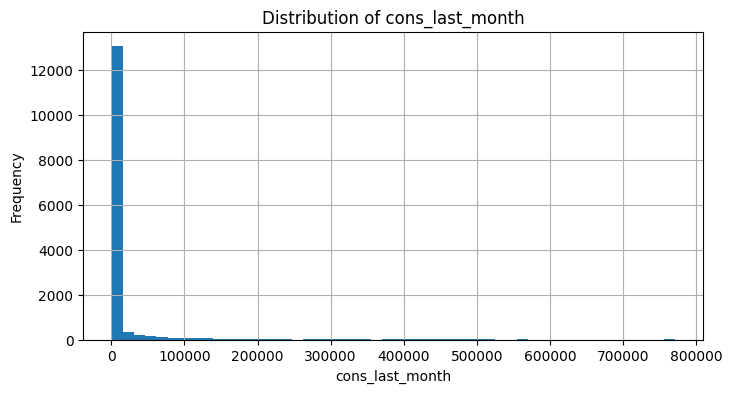

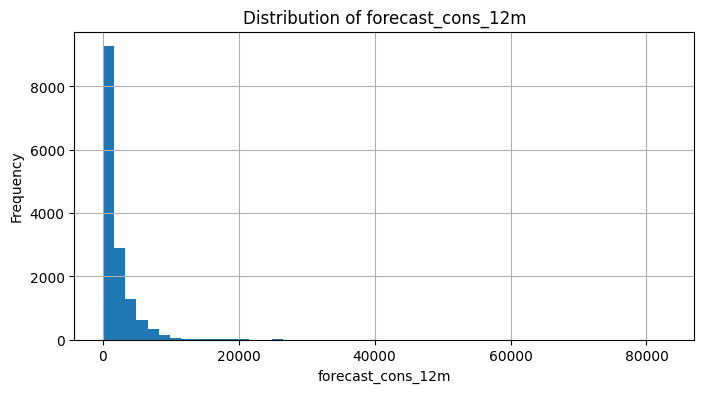

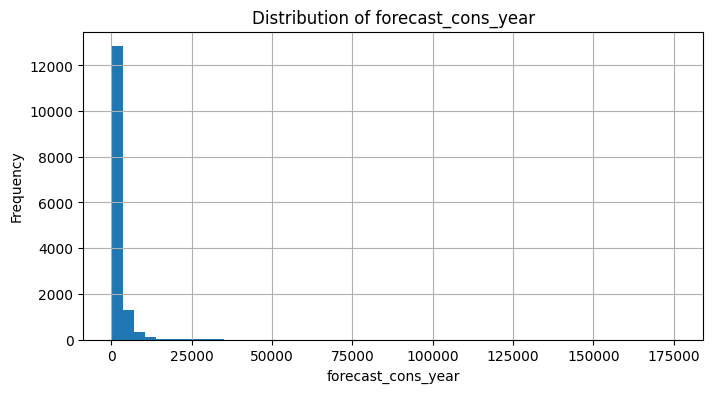

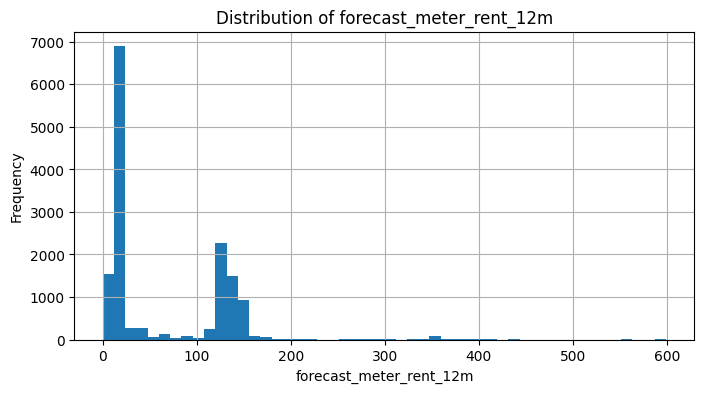

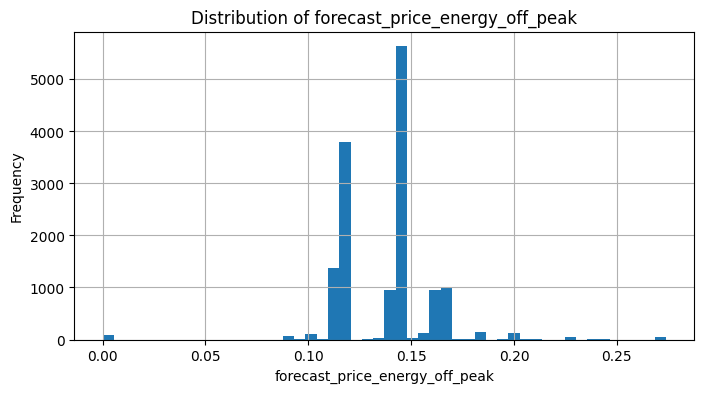

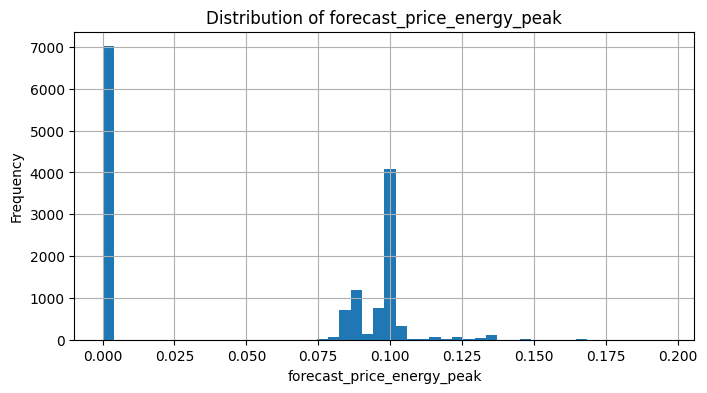

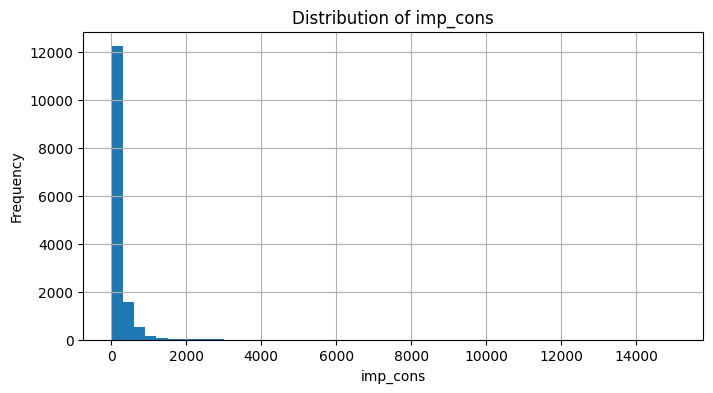

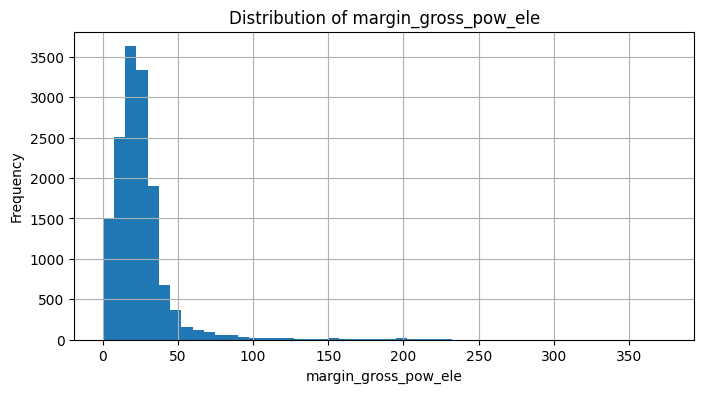

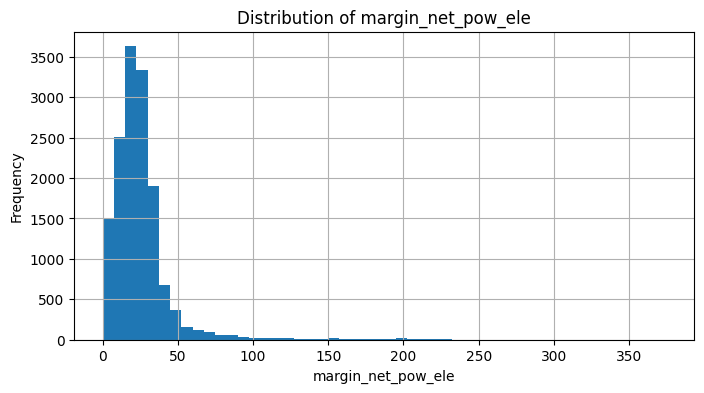

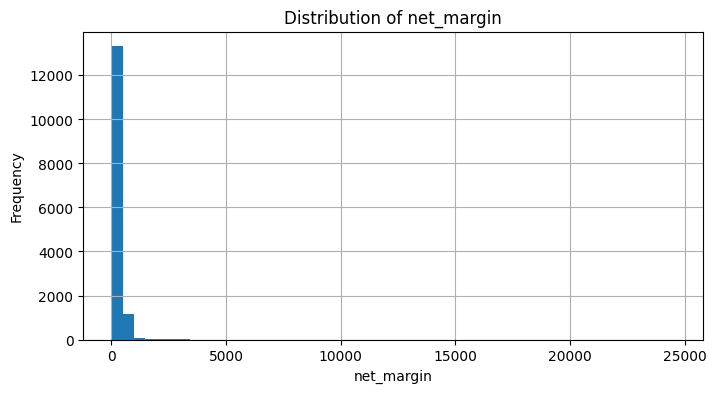

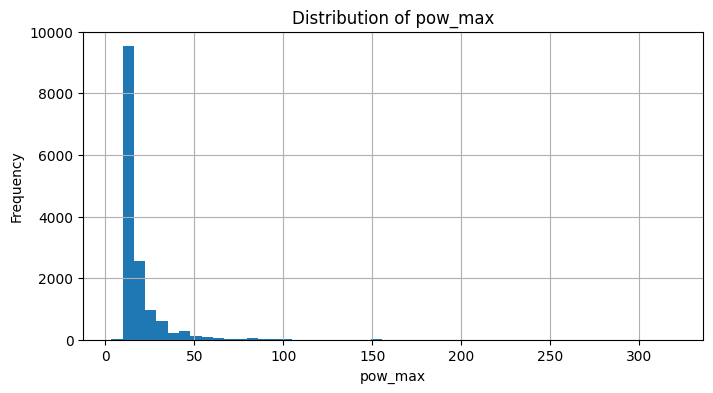

In [44]:
#numerical distributions
numeric_cols = [
    "cons_12m",
    "cons_gas_12m",
    "cons_last_month",
    "forecast_cons_12m",
    "forecast_cons_year",
    "forecast_meter_rent_12m",
    "forecast_price_energy_off_peak",
    "forecast_price_energy_peak",
    "imp_cons",
    "margin_gross_pow_ele",
    "margin_net_pow_ele",
    "net_margin",
    "pow_max"
]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    client[col].hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [45]:
# missing values check
client.isna().sum().sort_values(ascending=False)


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [46]:
# summary statistics
client.describe()


,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [48]:
# summary stats of merged 
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,num_years_antig,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149,175149,175149,175149,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.000000,175149,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,2011-01-28 04:01:02.401726720,2016-07-27 20:42:41.923847680,2013-01-02 04:53:06.434407168,2015-07-21 09:21:44.825034752,1868.343884,1399.782380,0.967028,...,4.998276,18.134896,0.097077,2015-06-16 12:39:54.203792896,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,1.000000,3.300000,0.000000,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 00:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.980000,0.000000,0.000000,...,4.000000,12.500000,0.000000,2015-04-01 00:00:00,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-17 00:00:00,2015-07-27 00:00:00,1112.610000,314.000000,0.000000,...,5.000000,13.856000,0.000000,2015-07-01 00:00:00,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2400.350000,1745.000000,0.000000,...,6.000000,19.180000,0.000000,2015-10-01 00:00:00,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,13.000000,320.000000,1.000000,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221
std,5.735413e+05,1.629400e+05,64376.741908,NaN,NaN,NaN,NaN,2387.560169,3248.331276,5.109025,...,1.611801,13.535809,0.296064,NaN,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250


In [11]:
# 1. calling data sets
price = pd.read_csv(price_data_path)

client = pd.read_csv(client_data_path)

# Convert price dates
price["price_date"] = pd.to_datetime(price["price_date"], errors="coerce")

# Merge datasets
df = client.merge(price, how="left", on="id")
df.head()

# 2. cleaning and joinin
df = df.dropna(subset=["churn"])   # Remove rows with missing target
df.fillna(df.median(numeric_only=True), inplace=True)
df_model = pd.get_dummies(df, drop_first=True)

# 3. Price sensitivity model creation. [Change in Price/Change in Demand]
df_model["price_ratio_off_peak"] = (
    df["forecast_price_energy_off_peak"] / df["forecast_cons_12m"]
)

df_model["price_ratio_peak"] = (
    df["forecast_price_energy_peak"] / df["forecast_cons_12m"]
)

# 4. Training models 
from sklearn.model_selection import train_test_split

X = df_model.drop("churn", axis=1)
y = df_model["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

     


In [27]:
#Fixing Date Time Stamps
#Date time conversion
# Convert datetime columns to numeric timestamps
date_cols = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
# Convert datetime to numeric safely
for c in date_cols:
    client[c] = pd.to_datetime(client[c], errors='coerce')   # convert invalid values to NaT
    client[c] = client[c].view('int64') // 10**9             # convert to seconds
price["price_date"] = pd.to_datetime(price["price_date"], errors='coerce')
price["price_date"] = price["price_date"].view('int64') // 10**9

C:\Users\silom\AppData\Local\Temp\ipykernel_6568\503236744.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  client[c] = client[c].view('int64') // 10**9             # convert to seconds
C:\Users\silom\AppData\Local\Temp\ipykernel_6568\503236744.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  client[c] = client[c].view('int64') // 10**9             # convert to seconds
C:\Users\silom\AppData\Local\Temp\ipykernel_6568\503236744.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  client[c] = client[c].view('int64') // 10**9             # convert to seconds
C:\Users\silom\AppData\Local\Temp\ipykernel_6568\503236744.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``asty

In [30]:
# reconvert all date time columns
date_cols = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]

for c in date_cols:
    client[c] = pd.to_datetime(client[c], errors='coerce')
    client[c] = client[c].astype('int64') // 10**9


# drop all na columns 
X = client.drop(columns=["churn"])

# keep only numeric columns
X = X.select_dtypes(include=['int64','float64','bool'])
y = client["churn"]

# fill in remaining columns 
X = X.fillna(0)

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Fit logistic regression again 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


#coefficient importance
import numpy as np
coeff = pd.DataFrame({
    "feature": X.columns,
    "importance": np.abs(logreg.coef_[0])
}).sort_values(by="importance", ascending=False)

coeff.head(10)




Accuracy: 0.8943044906900328
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3286
           1       0.05      0.00      0.01       366

    accuracy                           0.89      3652
   macro avg       0.47      0.50      0.47      3652
weighted avg       0.81      0.89      0.85      3652



C:\Users\silom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,importance
13,forecast_price_pow_off_peak,0.055481
20,pow_max,0.009759
19,num_years_antig,0.009739
16,margin_net_pow_ele,0.005357
15,margin_gross_pow_ele,0.005320
17,nb_prod_act,0.001823
10,forecast_meter_rent_12m,0.001367
9,forecast_discount_energy,0.000997
14,imp_cons,0.000939
18,net_margin,0.000567


In [31]:
#5. Buidlding Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

import numpy as np

coeff = pd.DataFrame({
    "feature": X.columns,
    "importance": np.abs(logreg.coef_[0])
}).sort_values(by="importance", ascending=False)

coeff.head(10)





Logistic Regression Accuracy: 0.8943044906900328
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3286
           1       0.05      0.00      0.01       366

    accuracy                           0.89      3652
   macro avg       0.47      0.50      0.47      3652
weighted avg       0.81      0.89      0.85      3652



C:\Users\silom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,importance
13,forecast_price_pow_off_peak,0.055481
20,pow_max,0.009759
19,num_years_antig,0.009739
16,margin_net_pow_ele,0.005357
15,margin_gross_pow_ele,0.005320
17,nb_prod_act,0.001823
10,forecast_meter_rent_12m,0.001367
9,forecast_discount_energy,0.000997
14,imp_cons,0.000939
18,net_margin,0.000567


In [32]:
# Random Forest Tree Code

# 1. Build MOdel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'   # IMPORTANT for imbalanced churn data
)

rf.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

#Feature Importance for PowerCo
import pandas as pd
import numpy as np

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

importances.head(15)





Random Forest Accuracy: 0.9022453450164294
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.91      0.03      0.05       366

    accuracy                           0.90      3652
   macro avg       0.91      0.51      0.50      3652
weighted avg       0.90      0.90      0.86      3652

[[3285    1]
 [ 356   10]]


,feature,importance
0,cons_12m,0.101739
10,forecast_meter_rent_12m,0.099190
16,margin_net_pow_ele,0.092420
18,net_margin,0.091850
15,margin_gross_pow_ele,0.090384
7,forecast_cons_12m,0.088264
2,cons_last_month,0.067810
20,pow_max,0.066838
11,forecast_price_energy_off_peak,0.066136
14,imp_cons,0.049470


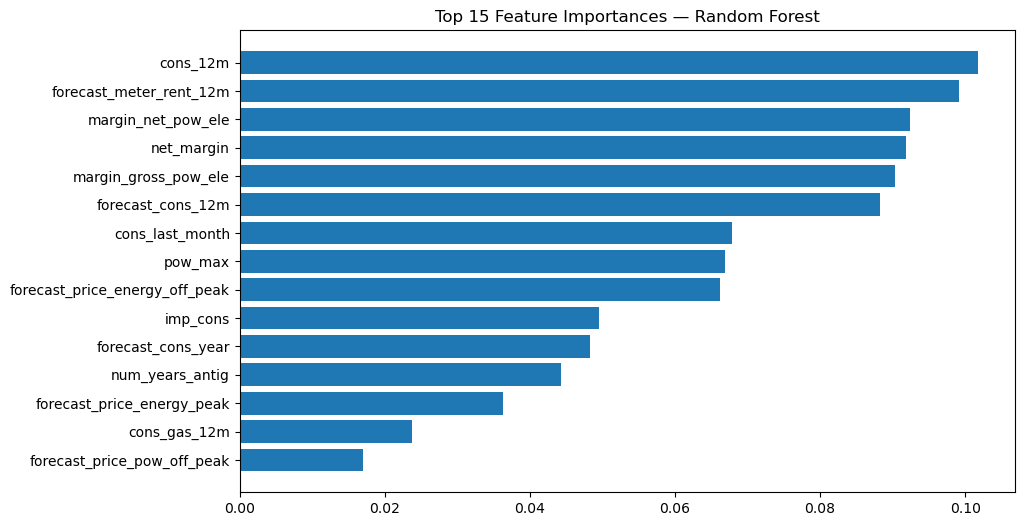

In [33]:
# Visualise Feature 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importances['feature'].head(15), importances['importance'].head(15))
plt.title("Top 15 Feature Importances — Random Forest")
plt.gca().invert_yaxis()
plt.show()
